<h1 style="color: purple; font-weight: bold;">"Unpacking Apple's Stock: A Journey Through Time and Data" </h1>

<h2 style="font-family: 'Poppins', sans-serif; font-weight: 300; font-size: 16px;">In this project, we will analyze the historical stock data of Apple Inc. to gain insights into its market trends over the years. By exploring key metrics such as stock price movements, trading volume, and volatility, we aim to identify patterns that could inform future predictions. Using data visualization techniques and machine learning models, we will attempt to forecast Apple's stock price and understand the factors that influence its performance in the stock market. This project will provide valuable insights for both investors and analysts looking to make informed decisions about Apple's stock. </h2>

In [24]:
import pandas as pd 
import os
import warnings
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/apple-aapl-historical-stock-data/HistoricalQuotes.csv


# Load Data

In [2]:
df = pd.read_csv('/kaggle/input/apple-aapl-historical-stock-data/HistoricalQuotes.csv')
df

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23
...,...,...,...,...,...,...
2513,03/05/2010,$31.2786,224647427,$30.7057,$31.3857,$30.6614
2514,03/04/2010,$30.1014,89591907,$29.8971,$30.1314,$29.8043
2515,03/03/2010,$29.9043,92846488,$29.8486,$29.9814,$29.7057
2516,03/02/2010,$29.8357,141486282,$29.99,$30.1186,$29.6771


## Data Exploration

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

text = f"""
{'='*20} Shape of Dataframe {'='*20}
{'_'*60}
{df.shape}

{'='*20} Data type of each column {'='*20}
{'_'*66}
{df.dtypes}

{'='*20} Missing value of each column {'='*20}
{'_'*70}
{df.isna().sum()}
"""
print(text)


==================== Shape of Dataframe ====================
____________________________________________________________
(2518, 6)

==================== Data type of each column ====================
__________________________________________________________________
Date           object
 Close/Last    object
 Volume         int64
 Open          object
 High          object
 Low           object
dtype: object

==================== Missing value of each column ====================
______________________________________________________________________
Date           0
 Close/Last    0
 Volume        0
 Open          0
 High          0
 Low           0
dtype: int64



<p style="font-family: 'Poppins', sans-serif; font-weight: 300; font-size: 16px;">Let's clean the dataset </p>t

Let's explore the trend of stock prices, specifically analyzing the year 2019 for better understanding.

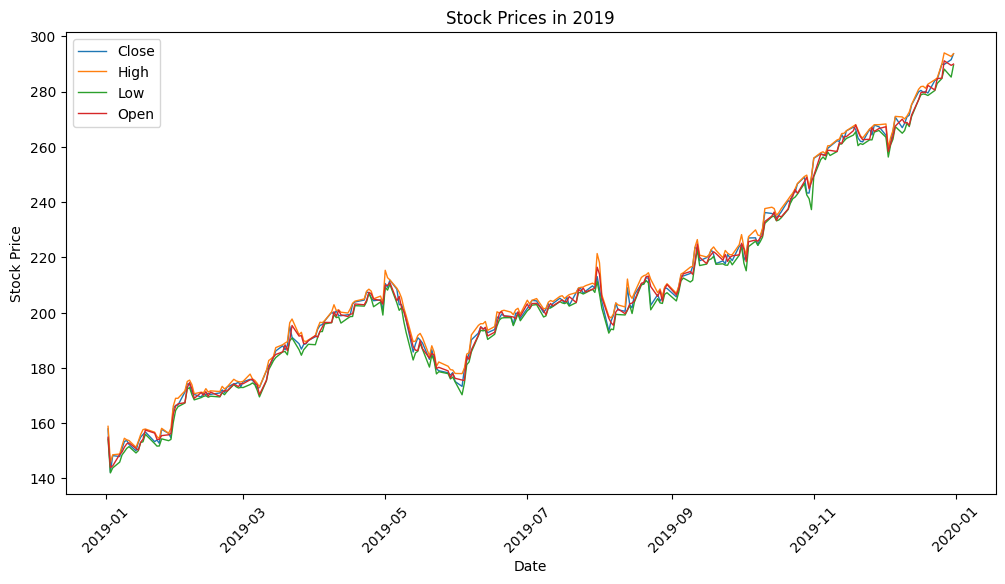

In [5]:
plt.figure(figsize=(12, 6))

df_2019 = df[df['Date'].dt.year == 2019]
sns.lineplot(x='Date', y='Close', data=df_2019, label='Close', linewidth=1)
sns.lineplot(x='Date', y='High', data=df_2019, label='High', linewidth=1)
sns.lineplot(x='Date', y='Low', data=df_2019, label='Low', linewidth=1)
sns.lineplot(x='Date', y='Open', data=df_2019, label='Open', linewidth=1)

plt.title('Stock Prices in 2019')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

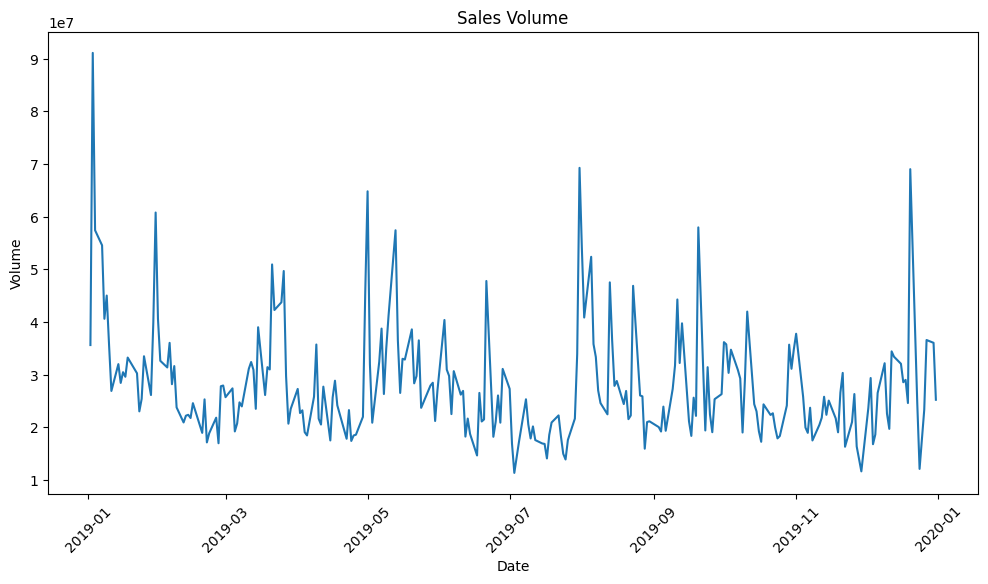

In [6]:
plt.figure(figsize=(12, 6)) 
sns.lineplot(x='Date', y='Volume', data=df_2019)
plt.title('Sales Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)  
plt.show()

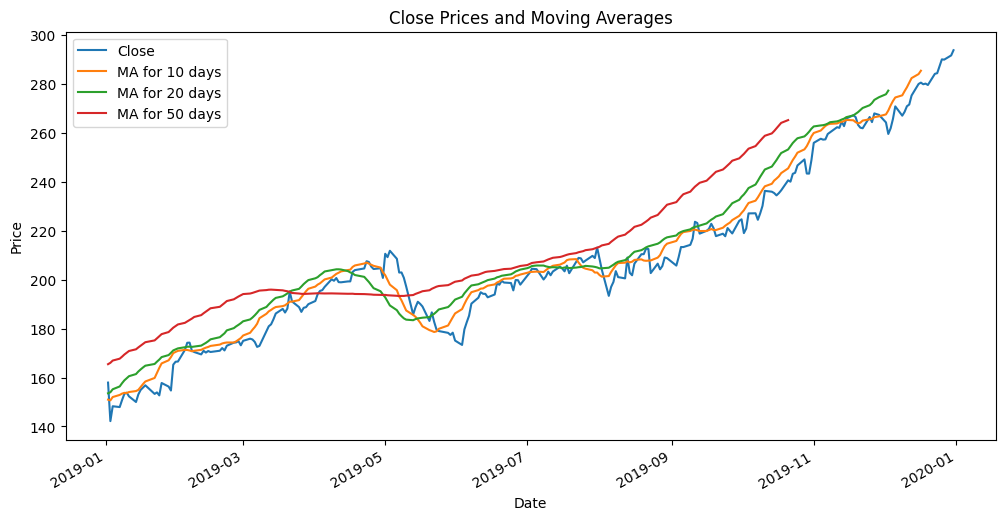

In [7]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df_2019[column_name] = df_2019['Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
df_2019[['Date', 'Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(x='Date', ax=axes)
axes.set_title('Close Prices and Moving Averages')
axes.set_xlabel('Date')
axes.set_ylabel('Price')
axes.legend()
plt.show()

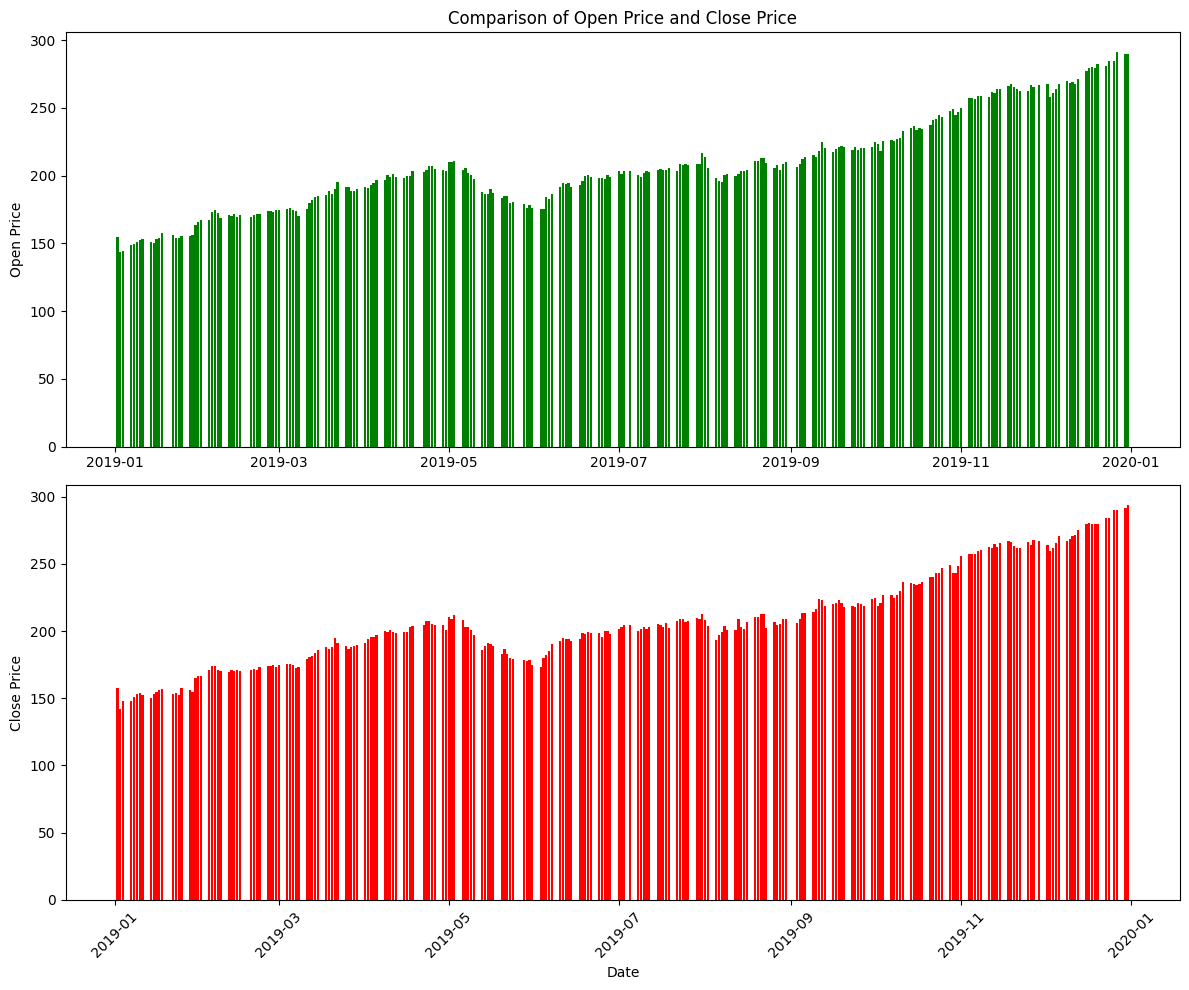

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

axes[0].bar(df_2019['Date'], df_2019['Open'], color='green', label='Open Price')
axes[0].set_ylabel('Open Price')
axes[0].set_xlabel(None)
axes[0].set_title('Comparison of Open Price and Close Price')

axes[1].bar(df_2019['Date'], df_2019['Close'], color='red', label='Close Price')
axes[1].set_ylabel('Close Price')
axes[1].set_xlabel('Date')
axes[1].tick_params(axis='x', rotation=45)  

fig.tight_layout()
plt.show()

## Preprocessing

The preprocessed data used for modeling includes cleaned and standardized information, ensuring that the input variables are consistent and ready for analysis.

In [9]:
import numpy as np

data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * 0.95))
training_data_len

2393

Scaling is used to normalize inconsistent values.

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

Create trainig set

In [11]:
training_data_len = int(np.ceil(len(dataset) * 0.95))
x_train = []
y_train = scaled_data[60:training_data_len, 0]

for i in range(60, len(scaled_data[60:training_data_len])):
    x_train.append(scaled_data[i-60:i, 0])

x_train = np.array(x_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

Create testing set

In [12]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

## Model

Training model using LSTM with EarlyStopping callbacks

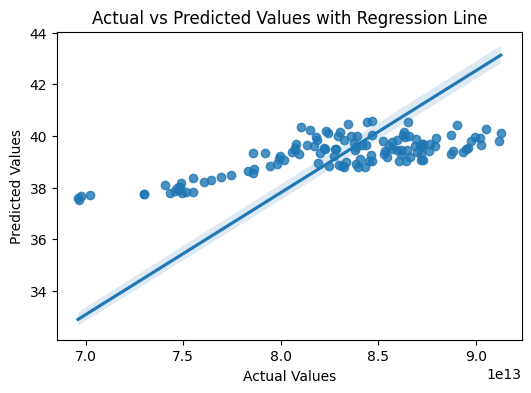

In [22]:
result_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predictions.flatten()})

# Regression plot
plt.figure(figsize=(6, 4))
sns.regplot(x='Actual', y='Predicted', data=result_df)
plt.title('Actual vs Predicted Values with Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

plot the differences between actual and predicted values with residual value

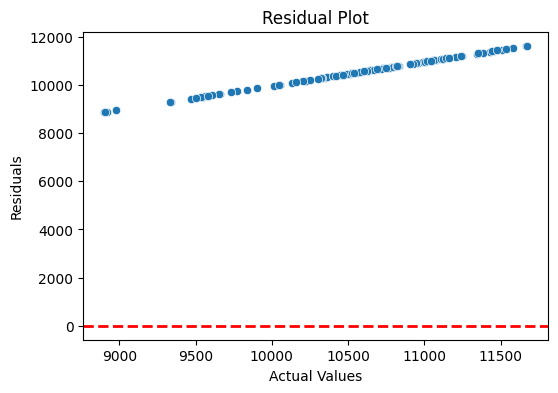

In [16]:
result_df['Residuals'] = result_df['Actual'] - result_df['Predicted']

# Residual plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Actual', y='Residuals', data=result_df)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2) 
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

visualize the difference between actual and predicted values.

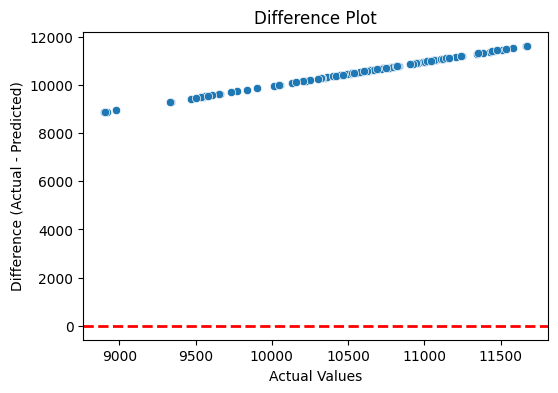

In [17]:
result_df['Difference'] = result_df['Actual'] - result_df['Predicted']

# Difference plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Actual', y='Difference', data=result_df)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Difference Plot')
plt.xlabel('Actual Values')
plt.ylabel('Difference (Actual - Predicted)')
plt.show()